In [1]:
# Cohen–Sutherland Line Clipping (Simple)
INSIDE = 0
LEFT = 1
RIGHT = 2
BOTTOM = 4
TOP = 8
def find_code(x, y, xmin, ymin, xmax, ymax):
    code = INSIDE
    if x < xmin:
        code += LEFT
    elif x > xmax:
        code += RIGHT
    if y < ymin:
        code += BOTTOM
    elif y > ymax:
        code += TOP
    return code
def cohen_sutherland(x1, y1, x2, y2, xmin, ymin, xmax, ymax):
    code1 = find_code(x1, y1, xmin, ymin, xmax, ymax)
    code2 = find_code(x2, y2, xmin, ymin, xmax, ymax)
    while True:
        if code1 == 0 and code2 == 0:
            print("Clipped Line:", x1, y1, x2, y2)
            break
        elif (code1 & code2) != 0:
            print("Line is outside the window")
            break
        else:
            if code1 != 0:
                code_out = code1
            else:
                code_out = code2

            if code_out & TOP:
                x = x1 + (x2 - x1) * (ymax - y1) / (y2 - y1)
                y = ymax
            elif code_out & BOTTOM:
                x = x1 + (x2 - x1) * (ymin - y1) / (y2 - y1)
                y = ymin
            elif code_out & RIGHT:
                y = y1 + (y2 - y1) * (xmax - x1) / (x2 - x1)
                x = xmax
            elif code_out & LEFT:
                y = y1 + (y2 - y1) * (xmin - x1) / (x2 - x1)
                x = xmin
            if code_out == code1:
                x1, y1 = x, y
                code1 = find_code(x1, y1, xmin, ymin, xmax, ymax)
            else:
                x2, y2 = x, y
                code2 = find_code(x2, y2, xmin, ymin, xmax, ymax)
xmin, ymin, xmax, ymax = 10, 10, 100, 100
cohen_sutherland(0, 0, 120, 120, xmin, ymin, xmax, ymax)

Clipped Line: 10.0 10 100.0 100


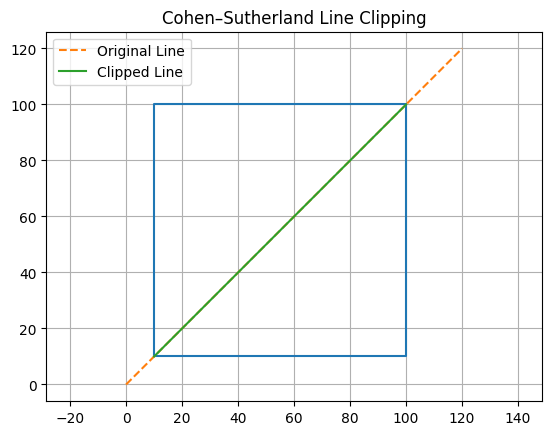

In [2]:
#Cohen–Sutherland with Visualization (Simple)
import matplotlib.pyplot as plt
INSIDE = 0
LEFT = 1
RIGHT = 2
BOTTOM = 4
TOP = 8
def find_code(x, y, xmin, ymin, xmax, ymax):
    code = INSIDE
    if x < xmin:
        code += LEFT
    elif x > xmax:
        code += RIGHT
    if y < ymin:
        code += BOTTOM
    elif y > ymax:
        code += TOP
    return code
def cohen_sutherland(x1, y1, x2, y2, xmin, ymin, xmax, ymax):
    code1 = find_code(x1, y1, xmin, ymin, xmax, ymax)
    code2 = find_code(x2, y2, xmin, ymin, xmax, ymax)
    while True:
        if code1 == 0 and code2 == 0:
            return x1, y1, x2, y2
        elif (code1 & code2) != 0:
            return None
        else:
            if code1 != 0:
                code_out = code1
            else:
                code_out = code2

            if code_out & TOP:
                x = x1 + (x2 - x1) * (ymax - y1) / (y2 - y1)
                y = ymax
            elif code_out & BOTTOM:
                x = x1 + (x2 - x1) * (ymin - y1) / (y2 - y1)
                y = ymin
            elif code_out & RIGHT:
                y = y1 + (y2 - y1) * (xmax - x1) / (x2 - x1)
                x = xmax
            elif code_out & LEFT:
                y = y1 + (y2 - y1) * (xmin - x1) / (x2 - x1)
                x = xmin
            if code_out == code1:
                x1, y1 = x, y
                code1 = find_code(x1, y1, xmin, ymin, xmax, ymax)
            else:
                x2, y2 = x, y
                code2 = find_code(x2, y2, xmin, ymin, xmax, ymax)
def draw(original, clipped, xmin, ymin, xmax, ymax):
    # Clipping window
    plt.plot(
        [xmin, xmax, xmax, xmin, xmin],
        [ymin, ymin, ymax, ymax, ymin]
    )
    # Original line
    x1, y1, x2, y2 = original
    plt.plot([x1, x2], [y1, y2], '--', label="Original Line")
    # Clipped line
    if clipped is not None:
        cx1, cy1, cx2, cy2 = clipped
        plt.plot([cx1, cx2], [cy1, cy2], label="Clipped Line")
    plt.title("Cohen–Sutherland Line Clipping")
    plt.axis("equal")
    plt.grid(True)
    plt.legend()
    plt.show()
xmin, ymin, xmax, ymax = 10, 10, 100, 100
original = (0, 0, 120, 120)
clipped = cohen_sutherland(0, 0, 120, 120, xmin, ymin, xmax, ymax)
draw(original, clipped, xmin, ymin, xmax, ymax)